# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [41]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [42]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [43]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(num_examples):
        print 'Label:' + categories[train_labels[i]]
        print 'Text:' + train_data[i] 
        print '------------------------------------------------'
        


### STUDENT END ###
P1(5)

Label:talk.religion.misc
Text:Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
------------------------------------------------
Label:sci.space
Text:

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrati

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [44]:
def P2():
## STUDENT START ###
    from sklearn.feature_extraction.text import CountVectorizer
    cvec = CountVectorizer()
#a
    t_train = cvec.fit_transform(train_data)
    vocab_size = len(cvec.vocabulary_)
    print "A: out of transform"
    print "Vocabulary size:", vocab_size
    print "avg num of nonzeros per example:", t_train.nnz * 1.0 / t_train.shape[0]
    print "fraction of non-zero entries in matrix: ", t_train.nnz*1.0 / (t_train.shape[0] * t_train.shape[1])
    print ''
#b
    featurenames = cvec.get_feature_names()
    print "B: 0th and last feature strings"
    print featurenames[0], featurenames[-1]
    print ''
#c

    myvocab =  ["atheism", "graphics", "space", "religion"]
    cvec_c = CountVectorizer(vocabulary=myvocab)
    t_train_c = cvec_c.fit_transform(train_data)
    vocab_size_c = len(cvec_c.vocabulary_)
    print "C: "
    print "Vocabulary Size:", vocab_size_c
    print "avg num of nonzeros per example:", t_train_c.nnz * 1.0 / t_train_c.shape[0]
    print ''

#d
    bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))
    trigram_vectorizer = CountVectorizer(ngram_range=(1, 3))
    t_train_bigram = bigram_vectorizer.fit_transform(train_data)
    t_train_trigram = trigram_vectorizer.fit_transform(train_data)
    print "D: Bigram and Trigram"
    print 'Bigram Vocab: ', len(bigram_vectorizer.vocabulary_)
    print 'Trigram Vocab: ', len(trigram_vectorizer.vocabulary_)
    print ''
#e
    cvec_e = CountVectorizer(min_df=10)
    t_train_e = cvec_e.fit_transform(train_data)
    vocab_size_e = cvec_e.vocabulary_
    print "E: min_df=10"
    print 'min_df=10 vocab size:', len(vocab_size_e)
    print ''
#f
    print "F: diff between train and dev data vocab"
    cvec_f1 = CountVectorizer()
    cvec_f1.fit_transform(dev_data)
    cvec_f2 = CountVectorizer()
    cvec_f2.fit_transform(train_data)
    print "dev data vocab size:", len(cvec_f1.vocabulary_)
    print "train data vocab size:", len(cvec_f2.vocabulary_)
    print "train_data vocab size - dev_data vocab size: ", len(cvec_f2.vocabulary_) - len(cvec_f1.vocabulary_)
    print ''
    
## STUDENT END ###
P2()

A: out of transform
Vocabulary size: 26879
avg num of nonzeros per example: 96.7059980334
fraction of non-zero entries in matrix:  0.00359782722696

B: 0th and last feature strings
00 zyxel

C: 
Vocabulary Size: 4
avg num of nonzeros per example: 0.268436578171

D: Bigram and Trigram
Bigram Vocab:  221770
Trigram Vocab:  537462

E: min_df=10
min_df=10 vocab size: 3064

F: diff between train and dev data vocab
dev data vocab size: 16246
train data vocab size: 26879
train_data vocab size - dev_data vocab size:  10633



(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [188]:
def P3():
### STUDENT START ###

    # K Nearest Neighbor
    print 'KNN:'
    best_kn = []
    for k in range(1,11):     
        kn_clf = Pipeline([('vect', CountVectorizer()),
                         ('knclf', KNeighborsClassifier(n_neighbors=k))]);
        kn_clf = kn_clf.fit(train_data, train_labels)
        pred = kn_clf.predict(test_data)
        best_kn.append(metrics.accuracy_score(test_labels,pred))
    bestK = max(best_kn)
    bestKIndex = best_kn.index(bestK) + 1
    print 'Best K =', bestKIndex, ' accuracy:', bestK
    kn_clf = Pipeline([('vect', CountVectorizer()),
                         ('knclf', KNeighborsClassifier(n_neighbors=bestKIndex))]);
    kn_clf = kn_clf.fit(train_data, train_labels)
    pred = kn_clf.predict(test_data)
    best_kn.append(metrics.accuracy_score(test_labels,pred))
    print 'F1 score: ',metrics.f1_score(test_labels, pred, average='weighted')
    print ''

    # Naive Bayes
    print 'Naive Bayes:'
    best_nb = []
    alphas = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
    for k in range(len(alphas)):
        mnb_clf = Pipeline([('vect', CountVectorizer()),
                             ('mnclf', MultinomialNB(alpha=alphas[k]))]);
        mnb_clf = mnb_clf.fit(train_data, train_labels)
        pred = mnb_clf.predict(test_data)
        best_nb.append(metrics.accuracy_score(test_labels,pred))
    bestAlphaAccuracy = max(best_nb)
    bestAlphaValue = alphas[best_nb.index(bestAlphaAccuracy)]
    print 'Best Alpha =', bestAlphaValue, ' accuracy:', bestAlphaAccuracy
    mnb_clf = Pipeline([('vect', CountVectorizer()),
                             ('mnclf', MultinomialNB(alpha=bestAlphaValue))]);
    mnb_clf = mnb_clf.fit(train_data, train_labels)
    pred = mnb_clf.predict(test_data)
    print 'F1 score: ',metrics.f1_score(test_labels, pred, average='weighted')
    print ''

    # Logistic Regression
    print 'Logistic Regression:'
    best_logit = []
    C = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    for k in range(len(C)):
        log_clf = Pipeline([('vect', CountVectorizer()),
                         ('lgclf', LogisticRegression(C=C[k]))]);
        log_clf = log_clf.fit(train_data, train_labels)
        pred = log_clf.predict(test_data)
        best_logit.append(metrics.accuracy_score(test_labels,pred))
        weights = log_clf.named_steps['lgclf'].coef_
        print 'C:', C[k]
        print 'SS:', sum(weights[0]**2),sum(weights[1]**2),sum(weights[2]**2),sum(weights[3]**2)
        print 'Total:', sum(weights[0]**2 + weights[1]**2 +weights[2]**2 +weights[3]**2)
    bestCAccuracy = max(best_logit)
    bestCValue = C[best_logit.index(bestCAccuracy)]
    print 'Best C =', bestCValue, ' accuracy:', bestCAccuracy
    log_clf = Pipeline([('vect', CountVectorizer()),
                         ('lgclf', LogisticRegression(C=bestCValue))]);
    log_clf = log_clf.fit(train_data, train_labels)
    pred = log_clf.predict(test_data)
    print 'F1 score: ',metrics.f1_score(test_labels, pred, average='weighted')
    print ''

### STUDENT END ###
P3()

KNN:
Best K = 1  accuracy: 0.415066469719
F1 score:  0.413458904628

Naive Bayes:
Best Alpha = 0.01  accuracy: 0.781388478582
F1 score:  0.781414578101

Logistic Regression:
C: 0.0001
SS: 0.00770174944675 0.0119412003106 0.00943507686564 0.00910283529383
Total: 0.0381808619168
C: 0.001
SS: 0.165093451668 0.200952746906 0.180670937544 0.187242784378
Total: 0.733959920497
C: 0.01
SS: 2.54147992696 2.93970936836 2.8624688135 2.25002877119
Total: 10.59368688
C: 0.1
SS: 27.1329066541 24.6514679412 27.4584369454 23.0251535524
Total: 102.267965093
C: 0.5
SS: 102.621430098 83.0995412443 98.9817991293 89.006739269
Total: 373.709509741
C: 0.2
SS: 49.7422952246 42.7413606356 49.3203133874 42.659313239
Total: 184.463282487
C: 0.3
SS: 69.2835354936 57.8665710599 67.8993913366 59.7733122823
Total: 254.822810172
C: 0.4
SS: 86.7319003591 71.1511712959 84.2621473956 75.0677024608
Total: 317.212921511
C: 0.5
SS: 102.621430098 83.0995412443 98.9817991293 89.006739269
Total: 373.709509741
C: 0.6
SS: 117.2

ANSWER:
a: KNN does not work well for text classification because there are a lot of words frequently used in all categories, thus we cannot predict the labels well just because a sentence has words like 'many, those, who, etc.'.
b: Logistic Regression does not work as well as Naive Bayes because English words tend to follow certain patterns, which Naive Bayes can calculate well by taking the posterior probability of the word.  
c: Value of C is the inverse of regularization strength, decreasing C increases Regularization. As we increase the C value, the Sum of Squared Weights increases for each class.


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [151]:
def P4():
### STUDENT START ###
    log_clf = Pipeline([('vect', CountVectorizer()),
                         ('lgclf', LogisticRegression())]);
    log_clf = log_clf.fit(train_data, train_labels)
    pred = log_clf.predict(test_data)
#     print(metrics.classification_report(test_labels, pred,
#                target_names=categories))
    print metrics.accuracy_score(test_labels,pred)
    
    vect = log_clf.named_steps['vect']
    lgclf = log_clf.named_steps['lgclf']
    features = vect.get_feature_names();
    weights = lgclf.coef_
    weight_indexes = []
    for i in range(4):
        weight_index = weights[i].argsort()[-5:][::-1].tolist()
        weight_indexes += (weight_index)    
#     print categories[0], '\t',categories[1], '\t',categories[2], '\t',categories[3]
    for i in range(len(weight_indexes)):
        index = weight_indexes[i]
        print 'Feature Name:', features[index]
        print weights[0][index],' ',weights[1][index],' ',weights[2][index],' ',weights[3][index]
        print ''
    print ''
    
    print 'Bigram:'
    log_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                         ('lgclf', LogisticRegression())]);
    log_clf = log_clf.fit(train_data, train_labels)
    pred = log_clf.predict(test_data)
    #print(metrics.classification_report(test_labels, pred,
    #           target_names=categories))
    print metrics.accuracy_score(test_labels,pred)
    
    vect = log_clf.named_steps['vect']
    lgclf = log_clf.named_steps['lgclf']
    features = vect.get_feature_names();
    weights = lgclf.coef_
    weight_indexes = []
    for i in range(4):
        weight_index = weights[i].argsort()[-5:][::-1].tolist()
        weight_indexes += (weight_index)    
#     print categories[0], '\t',categories[1], '\t',categories[2], '\t',categories[3]
    for i in range(len(weight_indexes)):
        index = weight_indexes[i]
        print 'Feature Name:', features[index]
        print weights[0][index],' ',weights[1][index],' ',weights[2][index],' ',weights[3][index]
        print ''
    print ''
        
### STUDENT END ###
P4()

0.738552437223
Feature Name: deletion
1.12523473517   -0.398016204379   -0.420484335924   -0.395524325961

Feature Name: atheists
1.03072036573   -0.0971637083623   -0.320937959167   -0.835160055803

Feature Name: bobby
0.989866267811   -0.220860596852   -0.340629598037   -0.463379931995

Feature Name: religion
0.953937119145   -0.616944404167   -0.792368965526   -0.0644060751223

Feature Name: atheism
0.939730226002   -0.410370295712   -0.449484982986   -0.434754414628

Feature Name: graphics
-0.758356286297   1.93658844167   -1.33605118844   -0.762705300939

Feature Name: image
-0.582837793308   1.34628462466   -0.82622763591   -0.468423518063

Feature Name: file
-0.334711962703   1.26645600224   -0.806647055042   -0.626795606942

Feature Name: 3d
-0.358945744427   1.12498035034   -0.702073033286   -0.37830812377

Feature Name: computer
0.14386287105   0.977708552761   -0.681860343915   -0.48729046715

Feature Name: space
-1.26033165964   -1.31591208975   2.16236713961   -1.170809978

ANSWER: Those features with the largest weight seem to be consistent between unigram and bigram models.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [189]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    repl = re.sub('&', ' and ', s)
    repl = repl.lower()
    repl = repl.replace('0',' zero ')
    repl = repl.replace('1',' one ')
    repl = repl.replace('2',' two ')
    repl = repl.replace('3',' three ')
    repl = repl.replace('4',' four ')
    repl = repl.replace('5',' five ')
    repl = repl.replace('6',' six ')
    repl = repl.replace('7',' seven ')
    repl = repl.replace('8',' eight ')
    repl = repl.replace('9',' nine ')
    repl = re.sub('[^a-z]+',' ', repl)
    return repl

### STUDENT END ###

def P5():
### STUDENT START ###
    log_clf = Pipeline([('vect', CountVectorizer(preprocessor=better_preprocessor)),
                         ('lgclf', LogisticRegression())]);
    log_clf = log_clf.fit(train_data, train_labels)
    pred = log_clf.predict(test_data)
    print(metrics.classification_report(test_labels, pred,
               target_names=categories))
    print metrics.accuracy_score(test_labels,pred)
    vocab_size = len(log_clf.named_steps['vect'].vocabulary_)
    print 'vocab size:',  vocab_size
    print 'vocab decrease =', 26879, '-', vocab_size, '=', 26879 - vocab_size
### STUDENT END ###
P5()

                    precision    recall  f1-score   support

       alt.atheism       0.64      0.62      0.63       154
talk.religion.misc       0.87      0.85      0.86       204
     comp.graphics       0.75      0.84      0.79       195
         sci.space       0.65      0.57      0.61       124

       avg / total       0.74      0.74      0.74       677

0.742983751846
vocab size: 24005
vocab decrease = 26879 - 24005 = 2874


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

C = 0.1 	Vocab Size from L1:  240
C = 0.2 	Vocab Size from L1:  442
C = 0.3 	Vocab Size from L1:  699
C = 0.4 	Vocab Size from L1:  813
C = 0.5 	Vocab Size from L1:  1059
C = 0.6 	Vocab Size from L1:  1181
C = 0.7 	Vocab Size from L1:  1411
C = 0.8 	Vocab Size from L1:  1344
C = 0.9 	Vocab Size from L1:  1624
C = 1 	Vocab Size from L1:  1616


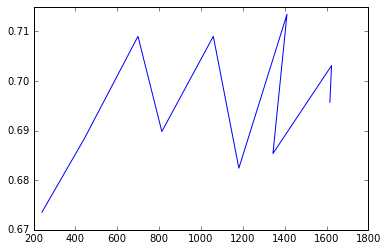

In [220]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    C = [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    acc_arr = []
    vocab_size = []
    for C_val in C:
        log_clf = Pipeline([('vect', CountVectorizer()),
                             ('lgclf', LogisticRegression(penalty='l1', C=C_val, tol=0.1))]);
        log_clf = log_clf.fit(train_data, train_labels)
        pred = log_clf.predict(test_data)
#         print(metrics.classification_report(test_labels, pred,
#                    target_names=categories))
#         print metrics.accuracy_score(test_labels,pred)
        vect = log_clf.named_steps['vect']
        lg_clf = log_clf.named_steps['lgclf']
        features = vect.get_feature_names()
        weights = lg_clf.coef_
        vocab = [];
        for x in range(weights.shape[1]):
            if weights[0][x]!=0 or weights[1][x]!=0 or weights[2][x]!=0 or weights[3][x]!=0 : 
                vocab.append(features[x])
        print 'C =',C_val,'\tVocab Size from L1: ', len(vocab)
        vocab_size.append(len(vocab))
        log_clf = Pipeline([('vect', CountVectorizer(vocabulary=vocab)),
                             ('lgclf', LogisticRegression(penalty='l2', C=C_val,tol=0.1))]);
        log_clf = log_clf.fit(train_data, train_labels)
        pred = log_clf.predict(test_data)
        acc_arr.append(metrics.accuracy_score(test_labels,pred))
#         print(metrics.classification_report(test_labels, pred,
#                    target_names=categories))
#         print metrics.accuracy_score(test_labels,pred)
    plt.plot(vocab_size, acc_arr)
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [184]:
def P7():
    ### STUDENT START ###
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidvec = TfidfVectorizer();
    train_X = tfidvec.fit_transform(train_data)
    log_clf = LogisticRegression(C=100)
    log_clf = log_clf.fit(train_X, train_labels)
    dev_X = tfidvec.transform(dev_data)
    pred = log_clf.predict(dev_X)
    print(metrics.classification_report(dev_labels, pred,
               target_names=categories))
    print metrics.accuracy_score(dev_labels,pred)
    R_arr = []
    prob = log_clf.predict_proba(dev_X)
    for index in range(prob.shape[0]):
        prob_arr = prob[index]
        max_prob = max(prob_arr)
        corr_label_prob = prob[index][dev_labels[index]]
        R = max_prob/corr_label_prob
        R_arr.append(R)
    top_3_R = sorted(R_arr, reverse=True)[:3]
    for R in top_3_R:
        index = R_arr.index(R)
        print 'R = ', R
        print categories[dev_labels[index]]
        print dev_data[index]
        print ''
    ### STUDENT END ###
P7()

                    precision    recall  f1-score   support

       alt.atheism       0.69      0.62      0.65       165
talk.religion.misc       0.80      0.91      0.85       185
     comp.graphics       0.83      0.83      0.83       199
         sci.space       0.68      0.64      0.66       127

       avg / total       0.76      0.76      0.76       676

0.763313609467
R =  929.358248637
sci.space
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that t

ANSWER: The TfidfVectorizer is different from the CountVectorizer because it uses term frequence instead of the raw frequencies of occurrence of a token in a given document. From the three documents where R is the greatest, one mistake the model is seems to be in sci.space class, where Book of Mormon gets mentioned and gets the model confused with another category.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance